In [22]:
import numpy as np
import sys
import math
from Bio import SeqIO
import random
import matplotlib.pyplot as plt
import os
import time

In [23]:
subst_mat = np.array([
        [0,5,2,5],
        [5,0,5,2],
        [2,5,0,5],
        [5,2,5,0]
    ])

In [24]:
def C(i,j,a):
    if T[i, j] == None:        
        dict_subst = {"A":0, "C": 1, "G":2, "T":3}
        v1,v2,v3,v4 = sys.maxsize,sys.maxsize,sys.maxsize,sys.maxsize
        if i>0 and j>0 : 
            v1 = C(i-1,j-1,a)+subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]]
        if i>0 and j>=0 : 
            v2 = C(i-1,j,a)+a
        if i>=0 and j>0 : 
            v3 = C(i, j-1,a)+a
        if i==0 and j==0 : 
            v4 = 0
        T[i,j] = min(v1,v2,v3,v4)
    return T[i,j] 

In [25]:
def RecurBackTrack(i,j, seq1, seq2, gap_cost, T, align1="", align2=""):
    dict_subst = {"A":0, "C": 1, "G":2, "T":3}
    if i>0 and j>0 and T[i,j]==T[i-1,j-1]+ subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]] :
        align1 = seq1[i-1] + align1
        align2 = seq2[j-1] + align2
        RecurBackTrack(i-1,j-1,seq1, seq2, gap_cost, T, align1, align2)
    elif i>0 and j>=0 and T[i,j]==T[i-1,j]+ gap_cost :
        align1 = seq1[i-1] + align1
        align2 = "_" + align2
        RecurBackTrack(i-1,j,seq1, seq2, gap_cost, T, align1, align2)
    elif i>=0 and j>0 and T[i,j]==T[i,j-1]+gap_cost :
        align1 = "_" + align1
        align2 = seq2[j-1] + align2
        RecurBackTrack(i,j-1, seq1, seq2, gap_cost, T, align1, align2)
    else:
        print (align1, align2)
        return None

In [26]:
def read_FASTA(filename):
    records_dict = {}
    for seq_record in SeqIO.parse(filename, "fasta"):
        records_dict[seq_record.id] = seq_record.seq        
    return records_dict

In [27]:
# Case 4
seq1 = list(read_FASTA("C:/Users/lenab/Documents/AU/Algorithms_in_bioinformatics/Week_1/seq1.fasta").values())[0]
seq2 = list(read_FASTA("C:/Users/lenab/Documents/AU/Algorithms_in_bioinformatics/Week_1/seq2.fasta").values())[0]
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))



325
GGCCTAAAGGCGCCGGTCTTTCGTACCCCAAAATCTCG_GCATTTTAAGATAA_GTGAGTGTTGCGTTACACTAGCGATCTACCGCGTCTTATACT_TAAGCG_TATGCCC_AGATCTGA_CTAATCGTGCCCCCGGATTAGACGGGCTTGATGGGAAAGAACA__G_CTC_G__TCTGTTTACGTATAAACAGAATCGCCTGGGTTCGC GGGCTAAAGGTTAGGGTCTTTCACACTAAAGAGTGGTGCGTATCGT_GGCTAATGT_ACCGCTTC_TGGTATC_GTGGCTTA_CG_GCCAGAC_CTACAAGTACTAGACCTGAGAACTAATCTTGTCGAGCCTTC_CATT_GA_GGG__TAATGGGAGAGAACATCGAGTCAGAAGTTATTCTTGTTTACGTAGAATCGCCTGGGTCCGC
None


In [7]:
#Case 1

seq1 = "ACGTGTCAACGT"
seq2 = "ACGTCGTAGCTA"

m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))

22
ACGT_GTCAACGT ACGTCGT_AGCTA
None


In [8]:
# Case 2
seq1 = "AATAAT"
seq2= "AAGG"
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))

14
AATAAT AA_GG_
None


In [9]:
# Case 3
seq1 = "TCCAGAGA"
seq2= "TCGAT" 
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))

20
TCCAGAGA T_C_GA_T
None


Definition of the substitution matrix format

In [15]:
#this reader assumes phylip-like format in txt file
# and that the matrix is DNA related and the nucleotides are in the order A,C,G,T
#therefore "skips" the first line and first character of each line following the first one
def read_subst_mtrx(filename):
    subst_mat = np.zeros((4,4))
    #skipping the first line
    f = open(filename,'r')
    f.readline()
    for i in range(0,4):
        line = f.readline()
        nums_in_line = line.split()
        for j in range(1,5):
            subst_mat[i,j-1] = nums_in_line[j]
    f.close()
    return subst_mat   

In [ ]:
seq1 = list(read_FASTA("C:/Users/alzbe/Documents/AU_Bioinfo_Masters/Spring_2021/AiB/Projects/Project_01/seq1.fasta").values())[0].lower()
seq2 = list(read_FASTA("C:/Users/alzbe/Documents/AU_Bioinfo_Masters/Spring_2021/AiB/Projects/Project_01/seq2.fasta").values())[0].lower()
print(seq1)
print(seq2)
subst_mat = read_subst_mtrx("C:/Users/alzbe/Documents/AU_Bioinfo_Masters/Spring_2021/AiB/Projects/Project_02/subst_matrix.txt")
print(subst_mat)

Function for linear gapcost with fasta files

In [28]:
def global_linear_cost(i,j, seq1, seq2, gap_cost, subst_mat, L):
    # if L== np.full([5,5],0):
     #   L = np.full([len(seq1)+1,len(seq2)+1], None)
    if L[i, j] == None:        
        dict_subst = {"A":0, "C": 1, "G":2, "T":3}
        v1,v2,v3,v4 = sys.maxsize,sys.maxsize,sys.maxsize,sys.maxsize
        if i>0 and j>0 : 
            v1 = global_linear_cost(i-1, j-1, seq1, seq2, gap_cost, subst_mat, L)+subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]]
        if i>0 and j>=0 : 
            v2 = global_linear_cost(i-1, j, seq1, seq2, gap_cost, subst_mat, L)+ gap_cost
        if i>=0 and j>0 : 
            v3 = global_linear_cost(i, j-1, seq1, seq2, gap_cost, subst_mat, L)+ gap_cost
        if i==0 and j==0 : 
            v4 = 0
        L[i,j] = min(v1,v2,v3,v4)
    return L[i,j] 

In [54]:
# We redefine the backtrack function such as it writes the output in a fasta file
def RecurBackTrack(i,j, seq1, seq2, gap_cost, T, align1="", align2=""):
    dict_subst = {"A":0, "C": 1, "G":2, "T":3}
    if i>0 and j>0 and T[i,j]==T[i-1,j-1]+ subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]] :
        align1 = seq1[i-1] + align1
        align2 = seq2[j-1] + align2
        RecurBackTrack(i-1,j-1,seq1, seq2, gap_cost, T, align1, align2)
    elif i>0 and j>=0 and T[i,j]==T[i-1,j]+ gap_cost :
        align1 = seq1[i-1] + align1
        align2 = "_" + align2
        RecurBackTrack(i-1,j,seq1, seq2, gap_cost, T, align1, align2)
    elif i>=0 and j>0 and T[i,j]==T[i,j-1]+gap_cost :
        align1 = "_" + align1
        align2 = seq2[j-1] + align2
        RecurBackTrack(i,j-1, seq1, seq2, gap_cost, T, align1, align2)
    else:
        f = open('alignment_with_linear_gap_cost.fasta','w')
        f.write(">Seq1 \n")
        f.write(align1)
        f.write("\n \n>Seq2 \n")
        f.write(align2)
        f.close()
        #print (align1, align2)
        return None

In [9]:
# Case 2
seq1 = "AATAAT"
seq2= "AAGG"
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(global_linear_cost(m,n, seq1, seq2, 5, subst_mat, np.full([m+1,n+1], None)  ))
print(RecurBackTrack(m,n,seq1, seq2, 5, T))

14
14
AATAAT AA_GG_
None


In [29]:
seq1="ACCGTA"
seq2= "AGCTAC"
m=len(seq1)
n=len(seq2)
print(global_linear_cost(m,n, seq1, seq2, 5, subst_mat, np.full([len(seq1)+1,len(seq2)+1], None)))

15


In [30]:
seq1 = "TCCAGAGA"
seq2= "TCGAT" 
m = len(seq1)
n = len(seq2)

print(global_linear_cost(m,n, seq1, seq2, 5, subst_mat, np.full([len(seq1)+1,len(seq2)+1], None)))

20


# Affine gap cost

In [10]:
#a and b are coefficients for the gap function
def global_affine_cost(seq1, seq2, a,b):
    dict_subst = {"A":0, "C": 1, "G":2, "T":3}
    m = len(seq1)
    n = len(seq2)
    
    for i in range(0, m+1):
        for j in range(0, n+1):
        # Compute D[i,j]
            v1,v2 = sys.maxsize,sys.maxsize
            if i>0 and j>=0 : 
                v1 = S[i-1,j]+(a+b)
            if i>1 and j>=0:
                v2 = D[i-1,j]+a
            D[i,j] = min(v1,v2)
                    
        # Compute I[i,j]
            v1,v2 = sys.maxsize,sys.maxsize
            if i>=0 and j>0:
                v1 = S[i,j-1]+(a+b)
            if i>=0 and j>1:
                v2 = I[i,j-1]+a
            I[i,j] = min(v1,v2)
                 
        # Compute S[i,j] 
            v1,v2,v3,v4 = sys.maxsize,sys.maxsize,sys.maxsize,sys.maxsize
            if i==0 and j==0 :
                v1 = 0                
            if i>0 and j>0:
                v2 = S[i-1,j-1] + subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]]
            if i>0 and j>=0:
                v3 = D[i,j]
            if i>=0 and j>0:
                v4 = I[i,j]
            S[i,j] = min(v1,v2,v3,v4)        
    return S[i,j]

In [11]:
#a and b are the parameters for the affine gap function g(k) = a+b*k
def backtrack_affine(seq1, seq2, a, b):
    i = len(seq1)
    j = len(seq2)
    align1 = ""
    align2 = ""
    dict_subst = {"A":0, "C": 1, "G":2, "T":3}
    while (i>0 or j>0):
        if (i>0 and j>0) and (S[i,j] == S[i-1,j-1] + subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]]):
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i = i-1
            j = j-1
        else:
            k = 1
            while True:
                if i>=k and S[i,j] == S[i-k,j] + (a+b*k):
                    l = i
                    while(l>=i-k+1):
                        align1 = seq1[l-1] + align1
                        align2 = "-" + align2
                        l = l-1
                    i = i-k
                    break
                elif j>=k and S[i,j] == S[i,j-k] + (a+b*k):
                    l = j
                    while(l>=i-k+1):
                        align1 = "-" + align1
                        align2 = seq2[l-1] + align2
                        l = l-1
                    j = j-k
                    break
                else:
                    k = k+1
    f = open('alignment_with_affine_gap_cost.fasta','w')
    f.write(">Seq1 \n")
    f.write(align1)
    f.write("\n \n>Seq2 \n")
    f.write(align2)
    f.close()
    return align1, align2

In [60]:
seq1 = "AATAAT"
seq2 = "AAGG"

m = len(seq1)
n = len(seq2)

S = np.full([m+1,n+1], None)
I = np.full([m+1,n+1], None)
D = np.full([m+1,n+1], None)

print(global_affine_cost(seq1, seq2, 5,5))
print(S)
print(backtrack_affine(seq1, seq2, 5,5))

22
[[0 10 15 20 25]
 [10 0 10 15 20]
 [15 10 0 10 15]
 [20 15 10 5 15]
 [25 20 15 12 7]
 [30 25 20 17 14]
 [35 30 25 25 22]]
('AATAAT', 'A--AGG')


# Problem 2 : tests

## Running time of global_linear_cost

In [30]:
DNA = 'ACGT'
LINE_WIDTH = 60

def simulate_string(m):
    """Simulate a DNA sequence of length m."""
    nucleotides = [random.choice(DNA) for _ in range(m)]
    lines = []
    for i in range(0, m, LINE_WIDTH):
        lines.append(''.join(nucleotides[i:(i+LINE_WIDTH)]))
    return ''.join(lines)

In [22]:
simulate_string(200)

'CGGTCGCCTCAAAGATTGCATGTCGCGAGCCTGAAACCAGCAGCCCGCACTCAAAATCCATAGCCGGTCAGTATCAGGCAAAGCTTACGTGCTCGGAATTCCGGTGTTCAGTTCGTGAGCTGTCGTGTCCTTAGCGTTTTTCAAAGATGTTTACCTCATGGGCACATGGGATTTGAACGCATGGAACTGTATCTTGAAGG'

In [31]:
Ns = [10,100,200,300,400,500,1000,2000,4000,6000,8000,10000]
#of = open("eval_times_global_linear_cost.txt", "w")
construction_times= {}
for n in Ns : 
    print(n)
    for i in range(100) : 
            seq1 = simulate_string(n)
            seq2 = simulate_string(n)
            T = np.full([n+1,n+1], None)
            start_time = time.time()
            C(n,n,5)
            st_const_time = time.time() - start_time
            #thisline = str(n*n) + " : " + str(st_const_time) + "\n"
            #of.write(thisline)
            if (n*n) in construction_times:
                construction_times[(n*n)] += [st_const_time]
            else:
                construction_times[(n*n)] = [st_const_time]


construction_mean_times = {k: np.mean(construction_times[k]) for k in construction_times}

10
100
200
300
400
500
1000
2000
4000


RecursionError: maximum recursion depth exceeded in comparison

In [32]:
construction_mean_times = {k: np.mean(construction_times[k]) for k in construction_times}

In [33]:
# Construction of the axis data
xs = list(construction_mean_times.keys())
ys = []
for i in range(len(xs)) : 
    ys.append(construction_mean_times[xs[i]]/xs[i])
print(xs,ys)

[100, 10000, 40000, 90000, 160000, 250000, 1000000, 4000000] [7.492303848266602e-06, 1.028506875038147e-05, 8.290965914726257e-06, 5.280371348063151e-06, 5.3321485221385955e-06, 5.190973777770996e-06, 5.035133171081543e-06, 5.070632066130638e-06]


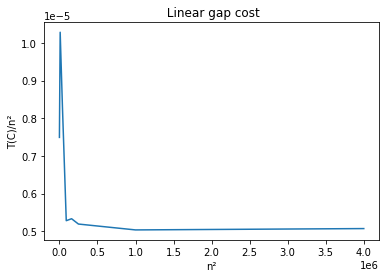

In [39]:
plt.plot(xs, ys)
plt.xlabel("n²")
plt.ylabel("T(C)/n²")
plt.title(" Linear gap cost")
#plt.show()
plt.savefig("linear_cost")

## Running time of global_affine_cost

In [13]:
Ns =[10,100,200,300,400,500,1000,2000,4000,6000,8000,10000]
of = open("eval_times_global_affine_cost.txt", "w")
construction_times= {}

for n in Ns : 
    print(n)
    for i in range(100) : 
            seq1 = simulate_string(n)
            seq2 = simulate_string(n)
            S = np.full([n+1,n+1], None)
            I = np.full([n+1,n+1], None)
            D = np.full([n+1,n+1], None)
            start_time = time.time()
            global_affine_cost(seq1, seq2, 5, 5)
            st_const_time = time.time() - start_time
            thisline = str(n*n) + " : " + str(st_const_time) + "\n"
            of.write(thisline)
            if (n*n) in construction_times:
                construction_times[(n*n)] += [st_const_time]
            else:
                construction_times[(n*n)] = [st_const_time]


construction_mean_times = {k: np.mean(construction_times[k]) for k in construction_times}

10
100


KeyboardInterrupt: 

[100, 400, 900] [8.976221084594727e-06, 7.985234260559082e-06, 6.302568647596572e-06]


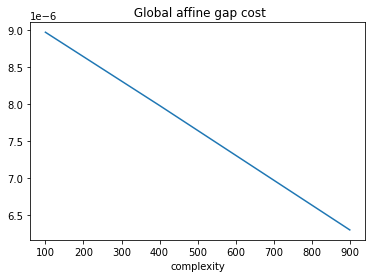

In [63]:
# Construction of the axis data
xs = list(construction_mean_times.keys())
ys = []
for i in range(len(xs)) : 
    ys.append(construction_mean_times[xs[i]]/xs[i])
print(xs,ys)

# Plot
plt.plot(xs, ys)
plt.xlabel("complexity")
plt.ylabel("")
plt.title(" Global affine gap cost")
plt.show()

## Compare the running time for computing an optimal alignment using linear gap cost in quadratic space and the running time for computing an optimal alignment using affine gap cost

In [ ]:
Ns = [10,100,200,300,400,500,1000,1500, 2000,2500]
affine_times = {}
linear_times = {}
ratio_times = {}

for n in Ns : 
    print(n)
    for i in range(50) : 
            seq1 = simulate_string(n)
            seq2 = simulate_string(n)
            
            # Affine backtracking
            S = np.full([n+1,n+1], None)
            I = np.full([n+1,n+1], None)
            D = np.full([n+1,n+1], None)
            global_affine_cost(seq1, seq2, 5, 5)
            start_time_affine = time.time()
            backtrack_affine(seq1, seq2, 5, 5)
            affine_backtrack_time = time.time() - start_time_affine
            
            if (n) in affine_times:
                affine_times[(n)] += [affine_backtrack_time]
            else:
                affine_times[(n)] = [affine_backtrack_time]
                
            # Linear backtracking
            T = np.full([n+1,n+1], None)
            global_linear_cost(n,n, seq1, seq2, 5, subst_mat, T) 
            start_time_linear = time.time()
            RecurBackTrack(n,n, seq1, seq2, 5, T)
            linear_backtrack_time = time.time() - start_time_linear
            if (n) in linear_times:
                linear_times[(n)] += [linear_backtrack_time]
            else:
                linear_times[(n)] = [linear_backtrack_time]
            
            # Ratio
            if linear_backtrack_time > 0 : 
                if (n) in ratio_times :
                    ratio_times[(n)]+=[affine_backtrack_time/linear_backtrack_time]
                else : 
                    ratio_times[(n)]=[affine_backtrack_time/linear_backtrack_time]
                
affine_mean_times = {k: np.mean(affine_times[k]) for k in affine_times}
linear_mean_times = {k: np.mean(linear_times[k]) for k in linear_times}

10
100
200
300
400
500
1000
1500
2000
2500


In [61]:
affine_mean_times = {k: np.mean(affine_times[k]) for k in affine_times}
linear_mean_times = {k: np.mean(linear_times[k]) for k in linear_times}
ratio_mean_times = {k: np.mean(ratio_times[k]) for k in ratio_times}

In [65]:
Ns = [10,100,200,300,400,500,1000,2000]
xs = list(linear_mean_times[n] for n in Ns)
ys = list(affine_mean_times[n] for n in Ns)

In [59]:
print(linear_mean_times)

{10: 0.00048115015029907225, 100: 0.0006249356269836426, 200: 0.00109344482421875, 300: 0.0023532390594482424, 400: 0.0016130590438842773, 500: 0.0018748903274536132, 1000: 0.004309706687927246, 2000: 0.009907209873199463}


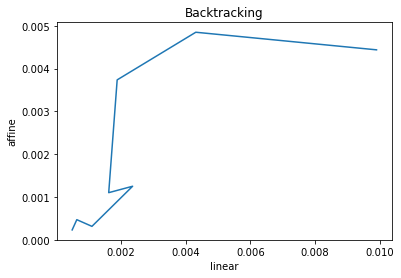

In [66]:
# Plot
plt.plot(xs, ys)
plt.xlabel("linear")
plt.ylabel("affine")
plt.title("Backtracking")
plt.savefig("affineVSlinear")

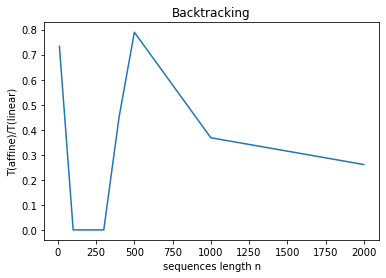

In [68]:
# Plot the ratio
xs = [10,100,200,300,400,500,1000,2000]
ys = list(ratio_mean_times[n] for n in Ns)
plt.plot(xs, ys)
plt.xlabel("sequences length n")
plt.ylabel("T(affine)/T(linear)")
plt.title("Backtracking")
plt.savefig("Ratio_affine_linear")

In [ ]:
# Plot the 2 curves on the same plot
Ns = [10,100,200,300,400,500,1000,2000]
xs = [10,100,200,300,400,500,1000,2000]
ys = list(linear_mean_times[n] for n in Ns)
zs = list(affine_mean_times[n] for n in Ns)

plt.plot(xs, ys, label = "Linear gap-cost")
plt.plot(xs, zs, label ) "Affine gap-cost"
plt.xlabel("sequences length n")
plt.ylabel("T(n)")
plt.title("Backtracking")
plt.savefig("comparison_affine_linear")